<a href="https://colab.research.google.com/github/jorferr89/10-ejemplos-opencv-python/blob/main/CarrilRuta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detección de Carril en la Ruta

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# FUNCIONES

# Calcular las coordenadas de una línea
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]  # Altura de la imagen
    y2 = int(y1 * (3/5))  # Altura a 3/5 desde abajo
    x1 = int((y1 - intercept) / slope)
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])

# Calcular la línea promedio para representar los carriles
def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

# Aplicar el algoritmo de detección de bordes Canny
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)  # Aplicar desenfoque Gaussiano
    canny = cv2.Canny(blur, 50, 150)  # Aplicar detección de bordes
    return canny

# Dibujar las líneas detectadas en una imagen vacía
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)  # Convertir a 1D array
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 10)  # Dibujar línea roja (BGR)
    return line_image

# Aplicar una máscara en la región de interés
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])  # Triángulo como región de interés
    mask = np.zeros_like(image)  # Crear una máscara negra
    cv2.fillPoly(mask, polygons, 255)  # Rellenar la región de interés con blanco en la máscara
    masked_image = cv2.bitwise_and(image, mask)  # Aplicar la máscara a la imagen
    return masked_image

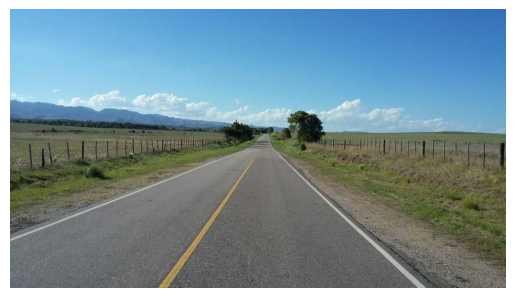

In [ ]:
# Cargar la imagen
image = cv2.imread('imagen-ruta.jpg')
# Convertir la imagen de BGR a RGB (matplotlib espera RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Mostrar la imagen con matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Desactivar los ejes
plt.show()

In [ ]:
# Aplicar los pasos de procesamiento
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength=10, maxLineGap=5)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)

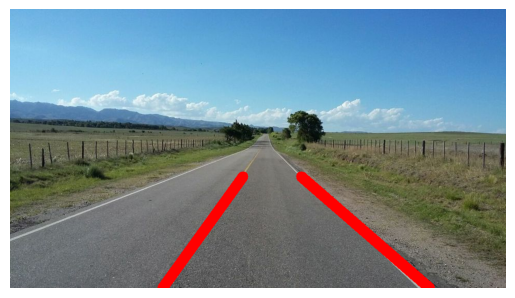

In [ ]:
# Dibujar las líneas en la imagen original
line_color = (0, 0, 255)
for line in averaged_lines:
    x1, y1, x2, y2 = line
    cv2.line(lane_image, (x1, y1), (x2, y2), line_color, 20)  # Grosor de la línea: 20 píxeles

# Convertir la imagen BGR a RGB (matplotlib espera RGB)
lane_image_rgb = cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con matplotlib
plt.imshow(lane_image_rgb)
plt.axis('off')  # Desactivar los ejes
plt.show()

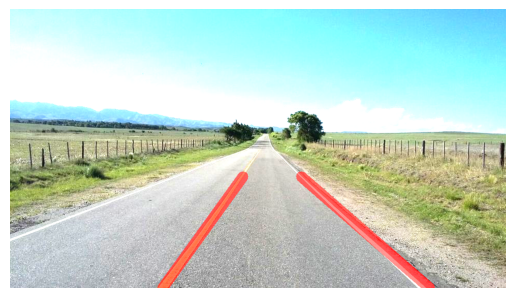

In [ ]:
# Superponer las líneas en la imagen original
combo_image = cv2.addWeighted(image, 0.8, lane_image, 1, 1)

# Convertir la imagen BGR a RGB (matplotlib espera RGB)
combo_image_rgb = cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con matplotlib
plt.imshow(combo_image_rgb)
plt.axis('off')  # Desactivar los ejes
plt.show()